# Assignment 4: Computational Code and Output
---

## Data Reading

In [9]:
library(tidyverse)
library(readr)
library(tidyr)
library(repr)
library(ggplot2)
library(cowplot)
library(moderndive)
library(broom)

In [10]:
url <- "https://raw.githubusercontent.com/Rz02/STAT_301_Group_38/main/Data/winequality-red.csv"
df <- read_csv(url)
red_wine <- separate(df, 
                     `fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;alcohol;quality`,
                     into = c("fixed_acidity", "volatile_acidity", "citric_acid",
                              "residual_sugar", "chlorides","free_sulfur_dioxide",
                              "total_sulfur_dioxide","density","pH","sulphates",
                              "alcohol","quality"),
                     sep = ";")

red_wine_round <- red_wine %>% 
   mutate(
    fixed_acidity = round(as.numeric(fixed_acidity), 1),
    volatile_acidity = round(as.numeric(volatile_acidity), 1),
    citric_acid = round(as.numeric(citric_acid), 1),
    residual_sugar = round(as.numeric(residual_sugar), 2),
    chlorides = round(as.numeric(chlorides), 2),
    free_sulfur_dioxide = round(as.numeric(free_sulfur_dioxide), 2),
    total_sulfur_dioxide = round(as.numeric(total_sulfur_dioxide), 2),
    density = round(as.numeric(density), 4),  
    pH = round(as.numeric(pH), 2),
    sulphates = round(as.numeric(sulphates), 2),
    alcohol = round(as.numeric(alcohol), 1))

head(red_wine_round)

Rows: 1599 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): fixed acidity;volatile acidity;citric acid;residual sugar;chlorides...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
7.4,0.7,0.0,1.9,0.08,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.9,0.0,2.6,0.10,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.8,0.0,2.3,0.09,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.3,0.6,1.9,0.07,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.7,0.0,1.9,0.08,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.7,0.0,1.8,0.07,13,40,0.9978,3.51,0.56,9.4,5


## Data Description 

Dataset Description:
We chose the dataset of red wine between the two given in the referred link above from the UC Irvine ML Repo Website, with variants of the Portuguese “Vinho Verde” wine.11 input variables based on physiochemical tests are given, which are factors that influence the wine’s quality.Meanwhile, 1 output variable based on sensory data is given, which is the quality score.The input variables’ data types are continuous, while the output data type is integer.


Dataset Source:
The datasets are sourced from the Vinho Verde region of Portugal. Detailed information can be found at Vinho Verde official website. The dataset is also referenced in the research by [Cortez et al., 2009].

Dataset Characteristics:

Number of observations: 1,599 for the red wine dataset

Number of variables: 12

|Variable | Type|
|---------|---------|
| Fixed Acidity((Measured in g(tartaric acid)/dm^3)    |    Numeric  |
|  Volatile Acidity(Measured in g(acetic acid)/dm^3)   | Numeric  |
| Citric Acid (Measured in g/dm^3)   | Numeric  |
| Residual Sugar   (Measured in g/dm^3)  |Numeric  |
| Chlorides   (Measured in g(sodium chloride)/dm^3) | Numeric  |
| Free Sulfur Dioxide (Measured in mg/dm^3) | Numeric  |
| Total Sulfur Dioxide (Measured in mg/dm^3)|Numeric  |
| Density(Measured in g/cm^3) | Numeric  |
| pH        (Measured on the pH scale)     | Numeric  |
| Sulphates        (Measured in g(potassium sulphate)/dm^3)      | Numeric  |
|Alcohol(Measured in % volume)|Numeric  |
|Quality(Score between 0 and 10)|Numeric  |

## Goal: How does fixed acidity,residual sugar and chlorides  influence the quality of red wine?

## Visualization 

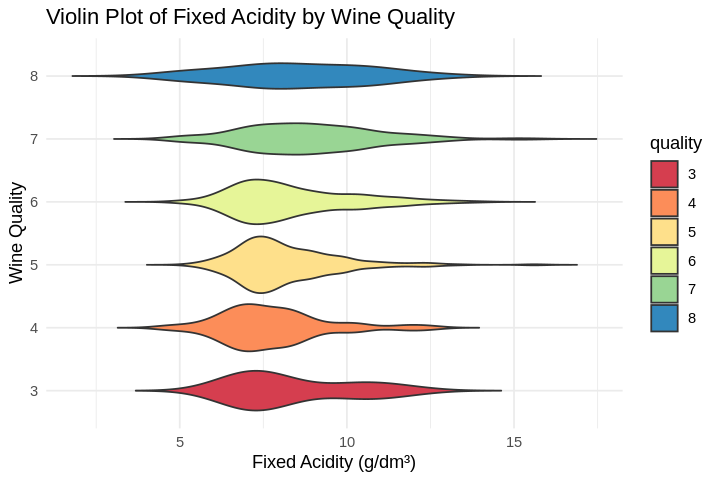

In [11]:
options(repr.plot.width = 6, repr.plot.height = 4)

# Fixed Acidity-Quality visualization
ggplot(red_wine_round, aes(x = fixed_acidity, y = quality, fill = quality)) +
  geom_violin(trim = FALSE) +
  labs(
    title = "Violin Plot of Fixed Acidity by Wine Quality",
    x = "Fixed Acidity (g/dm³)",
    y = "Wine Quality"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Spectral")


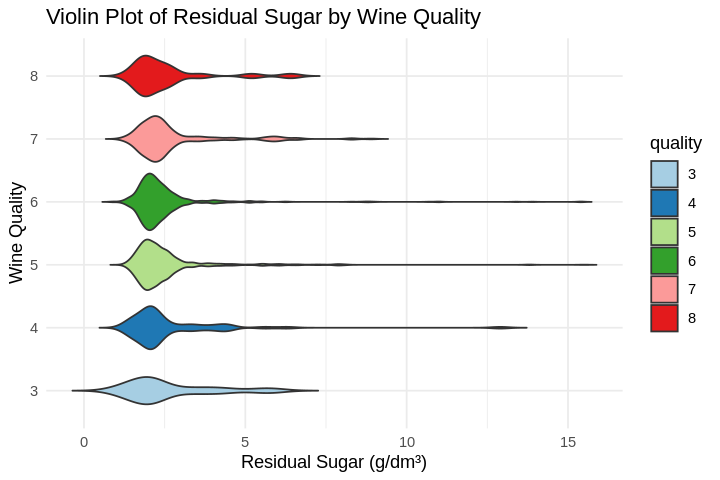

In [12]:
# Residual Sugar-Quality visualization
ggplot(red_wine_round, aes(x = residual_sugar, y = quality, fill = quality)) +
  geom_violin(trim = FALSE) +
  labs(title = "Violin Plot of Residual Sugar by Wine Quality",
       x = "Residual Sugar (g/dm³)",
       y = "Wine Quality") +
  scale_fill_brewer(palette = "Paired") +
  theme_minimal()

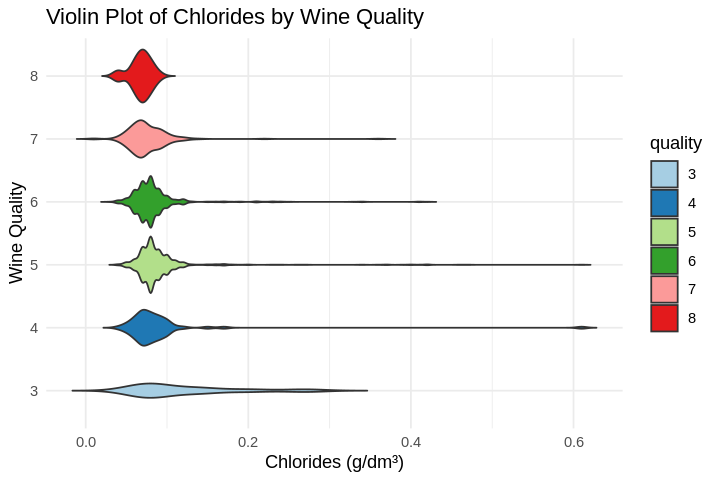

In [13]:
# Chlorides-Quality visualization
ggplot(red_wine_round, aes(x = chlorides, y = quality, fill = quality)) +
  geom_violin(trim = FALSE) +
  labs(title = "Violin Plot of Chlorides by Wine Quality",
       x = "Chlorides (g/dm³)",
       y = "Wine Quality") +
  scale_fill_brewer(palette = "Paired") +
  theme_minimal()

## Interpretation 

_The violin plots for fixed acidity, residual sugar, and chlorides across wine quality ratings reveal distinct distribution patterns for these physicochemical characteristics in relation to wine quality. Fixed acidity distributions are fairly consistent across quality levels, with higher quality wines exhibiting a narrower range, suggesting an optimal acidity level associated with higher wine quality. Residual sugar levels are relatively uniform across quality categories, indicating a potential non-significant role in determining wine quality, or that wine quality is less sensitive to variations in sugar content within the observed range. In contrast, chlorides show more variability, especially at lower quality levels, implying that chloride concentration might be more influential on wine quality, with lower quality wines possibly having higher chloride variability. Collectively, these plots suggest that certain physicochemical properties have optimal ranges that correlate with higher wine quality, although the exact nature of these relationships would require more detailed statistical analysis to confirm._

## Method Justification: 

_Given the interconnected nature of the variables under consideration, MLR is a suitable option because it enables the simultaneous assessment of numerous predictors. It is especially helpful in determining the nature and intensity of the connections between every physicochemical characteristic and the overall quality of the red wine._

_By looking at my goal and method, I will use a stepwise regression strategy, which systematically adds or removes predictors based on their statistical significance, by considering my purpose and methodology. By using this technique, I can create a model that is neither overfit nor underfit and will only contain factors that have a significant impact on the quality of wine._

## Assumptions and Diagnostic Measures: 

_As part of the regression analysis, I will check for the three main assumptions of MLR: linearity, homoscedasticity, and normality of residuals. Linearity will be assessed through scatterplots, and homoscedasticity will be evaluated with residual vs. fitted value plots, ensuring consistent error variance across predictions. The normality of residuals will be confirmed with Q-Q plots. To maintain the robustness and dependability of the regression model, any departures from these presumptions will be handled, such as variable transformation or the addition of interaction terms._

## Limitations and Mitigation Strategies:

_Multiple linear regression has a number of drawbacks, one of which is the possibility of multicollinearity, in which highly correlated independent variables may skew the importance of predictors. Calculating Variance Inflation Factors (VIF) and, if required, merging or deleting collinear variables will take care of this. The accuracy of the model can also be impacted by outliers and significant data points, which I want to find using influence statistics and diagnostic charts. In accordance with class requirements, remediation may entail data transformation or the elimination of certain points. Furthermore, as MLR presupposes a linear relationship between the variables, any non-linearity found in the residual analysis will be handled by examining interaction terms or polynomials. Finally, since MLR does not imply causation, results should be taken cautiously, understanding that the analysis is limited to identifying relationships._

_In order to comprehend the distribution of the data and the interactions between the variables, my goal is to begin with an exploratory data analysis. I will use MLR and carry out a comprehensive diagnostic check to test the assumptions after making sure the data is of high quality. In order to make sure the model generalizes effectively to new data, I will lastly evaluate the predicted accuracy of the model using cross-validation techniques._

## Conclusion:

_I hope to shed light on the relationship between red wine quality and fixed acidity, residual sugar, and chlorides using MLR and a strict stepwise model selection procedure. This method gives me a workable framework for carrying out an accurate and trustworthy analysis. Through the application of validation techniques and diagnostic evaluations, this project's results should provide important new information about the elements that affect red wine's sensory quality._

## Implementation of a proposed mode 

In [20]:
library(MASS)  # For stepwise regression
library(ggplot2)
library(dplyr)

# Assuming your dataset is already loaded as 'wine_data'
# and relevant variables are selected

# Split the data into training and testing sets for model validation
set.seed(123)  # Ensure reproducibility
training_wine <- sample_frac(red_wine_round, 0.6)
testing_wine <- setdiff(red_wine_round, training_wine)

# Run Stepwise Regression using stepAIC
stepwise_model <- stepAIC(lm(quality ~ fixed_acidity + residual_sugar + chlorides, data = training_wine), 
                          direction = "both")

# Summary of the model 
model_summary <- summary(stepwise_model)


Start:  AIC=-399.63
quality ~ fixed_acidity + residual_sugar + chlorides

                 Df Sum of Sq    RSS     AIC
- residual_sugar  1    0.0045 626.93 -401.63
<none>                        626.93 -399.63
- chlorides       1   13.2662 640.19 -381.55
- fixed_acidity   1   13.5559 640.48 -381.12

Step:  AIC=-401.63
quality ~ fixed_acidity + chlorides

                 Df Sum of Sq    RSS     AIC
<none>                        626.93 -401.63
+ residual_sugar  1    0.0045 626.93 -399.63
- chlorides       1   13.2677 640.20 -383.54
- fixed_acidity   1   13.6260 640.56 -383.01


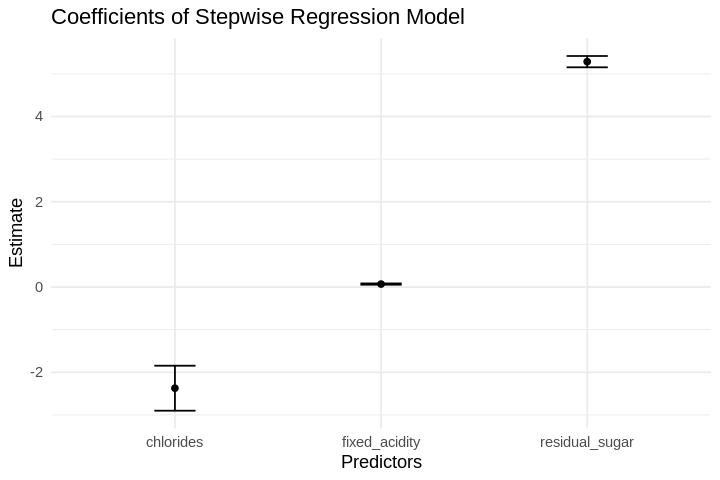

In [21]:
# Visualization: Coefficient Plot
coefficients <- broom::tidy(stepwise_model)
coefficients$term <- gsub("\\(Intercept\\)", "residual_sugar", coefficients$term)

ggplot(coefficients, aes(x = term, y = estimate)) +
  geom_errorbar(aes(ymin = estimate - std.error, ymax = estimate + std.error), width = 0.2) +
  geom_point() +
  theme_minimal() +
  labs(title = "Coefficients of Stepwise Regression Model",
       x = "Predictors", y = "Estimate")

## Interpretation of Results

_With an estimate well above zero, the coefficient plot shows that residual sugar significantly positively affects the dependent variable. Chlorides have a negative correlation with the result, as the estimate below zero shows. The result seems to be slightly positively correlated with fixed acidity, but the estimate is near zero with a small standard error, indicating that the correlation may not be statistically significant. According to these findings, residual sugar is a good predictor, but it's unclear how fixed acidity fits into this model; more research or a bigger sample size may be needed to determine its significance._